In [5]:
from lanefind import *
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [46]:
def showimageplt(image):

#     iname = name + '.png'
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap = 'gray')
#     fig.savefig(loc + "/" + iname, bbox_inches='tight')
#     plt.close(fig)
#     plt.clf()
#     print("[save:] %s" %(loc + "/" + iname))

Camera calibration matrix has been loaded from file
[save:] data/testing/straight_lines1_point.png


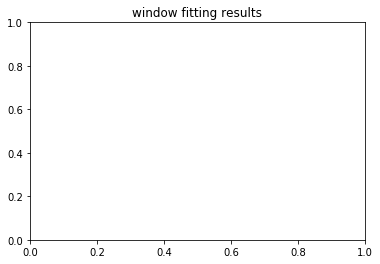

[save:] data/testing/straight_lines1_lanes.png


In [47]:
# [x] Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
mtx, dist = calibrateCamera()

Images = glob.glob(distortedImageLoc + "/*.jpg")
img = Images[0]
undistimg = applyDistortionCorrection(mtx, dist, img)
# saveimage(undistimg, img.split('/')[-1].split('.')[0] + '_undist', True)
binaryImage = applyThreshold(undistimg)
# saveimageplt(binaryImage, img.split('/')[-1].split('.')[0] + '_binary')
warped_img = perspectiveTransform(binaryImage, img)
# saveimageplt(warped_img, img.split('/')[-1].split('.')[0] + '_warped')
lanelocated1 = locatelanes(img, warped_img)

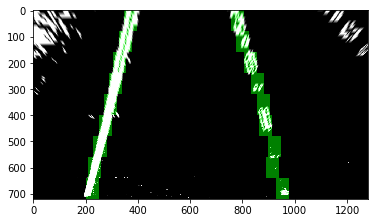

In [48]:
plt.imshow(lanelocated1, cmap='gray')

In [109]:
binary_warped = warped_img
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

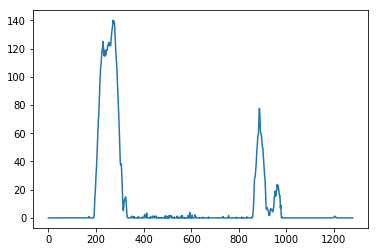

In [102]:
plt.plot(histogram)

In [112]:
rightx_base

887

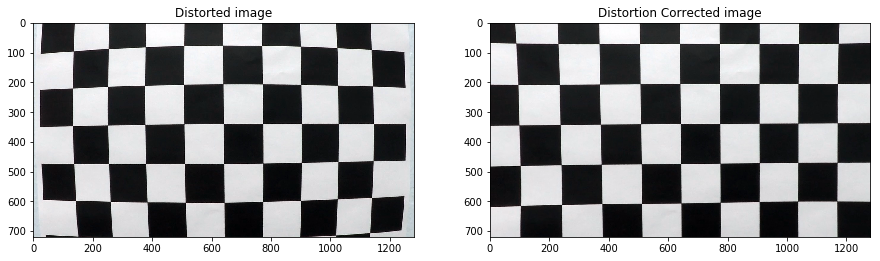

In [126]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(121)
plt.title("Distorted image")
ax.imshow(cv2.imread('camera_cal/calibration1.jpg'))
ax = fig.add_subplot(122)
plt.title("Distortion Corrected image")
ax.imshow(cv2.imread('data/testing/calibration1_cam_cal.png'))


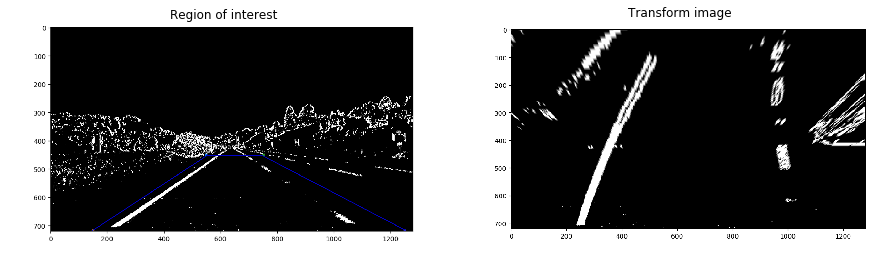

In [66]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(121)
plt.title("Region of interest")
# ax.imshow(cv2.imread('data/testing/straight_lines2_combined.png'))
ax.imshow(cv2.imread('output_images/lanes.jpeg'))
ax.set_axis_off()
ax = fig.add_subplot(122)
plt.title("Transform image")
ax.imshow(cv2.imread('data/testing/test6_warped.png'))
ax.set_axis_off()

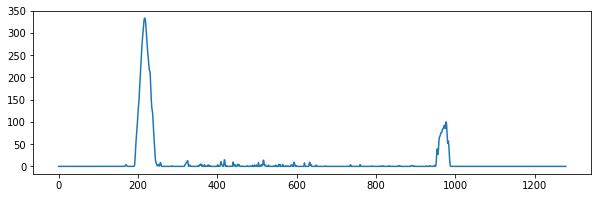

In [68]:
data = np.load("data/testing/straight_lines1_hist.npy")
fig = plt.figure(figsize=(10, 3))
# ax = fig.add_subplot(121)
# plt.title("Region of interest")
plt.plot(data)